In [1]:
from transformers import GPT2LMHeadModel

In [ ]:
model_hf=GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf=model_hf.state_dict()


model.safetensors:  10%|9         | 52.4M/548M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/gpt2/248dfc3911869ec493c76e65bf2fcf7f615828b0254c12b473182f0f81d3a707?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1742200090&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MjIwMDA5MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9ncHQyLzI0OGRmYzM5MTE4NjllYzQ5M2M3NmU2NWJmMmZjZjdmNjE1ODI4YjAyNTRjMTJiNDczMTgyZjBmODFkM2E3MDc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=eium8geVHyWvylwVvjQ7PDMRrG4Z22%7EDKSVkhjza8gSieTkWkYJCFyAmiaeKg5-qOO3HW7bYRZVDIT%7Efdz87MdDbIz4JqqI5eEX89J-E8%7EMFEKSESZL2m7JjERSg1gIdYCvEAa2DJucxYL0aRzHJYrK-FUQOfPwRASjMTq6XzxQjV9ND5Nyl71qHvRPdtbGdbBL-i6UkUPNkKOfoI2EAgrcHh8LfgOg0XhjmW5yFHsH6VmuvB9yQ%7EOSZnniXPozCcHKEbZvtP1uyMl5AJts8lJ0yfuz7%7E2cq2NZVTPBEeu996i-nbJvzS3uV1YNBXOxb%7EIW21ifF8R3Sy%7EIBx-nRdw__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnectionPool(host='cdn-lfs.hf.co', port=4

model.safetensors:  10%|9         | 52.4M/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [3]:
for k,v in sd_hf.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

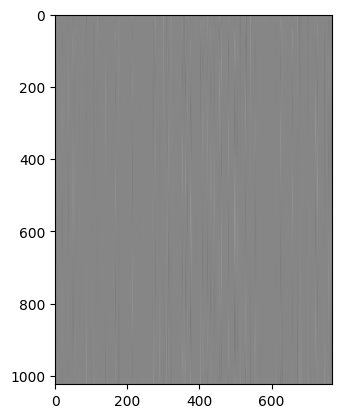

In [10]:
plt.imshow(sd_hf["transformer.wpe.weight"],cmap='gray')

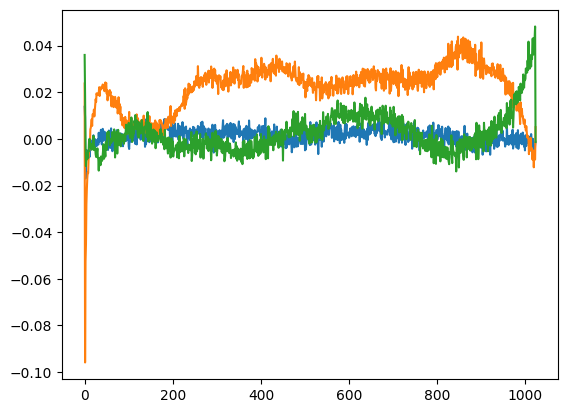

In [16]:
plt.plot(sd_hf["transformer.wpe.weight"][:,100])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])
plt.plot(sd_hf["transformer.wpe.weight"][:,600])

In [22]:
from transformers import pipeline,set_seed

generator=pipeline('text-generation','gpt2')
set_seed(42)
generator("Hello, I'am Language Model,",max_length=30)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'am Language Model, for you" —Miles Teller, The Times, March 11, 1963\n\n"An American Man'}]

In [ ]:
# !wget  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# toy data set